In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

In [3]:
with rio.open('/home/marta/PycharmProjects/Earth analytics/spatial/outputs/lidar_chm.tiff') as lidar_chm_src:
    lidar_chm = lidar_chm_src.read(1)


In [31]:
# Define the colors you want
cmap = ListedColormap(["white", "tan", "springgreen", "darkgreen"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 2, 10, 20, 30], 5)


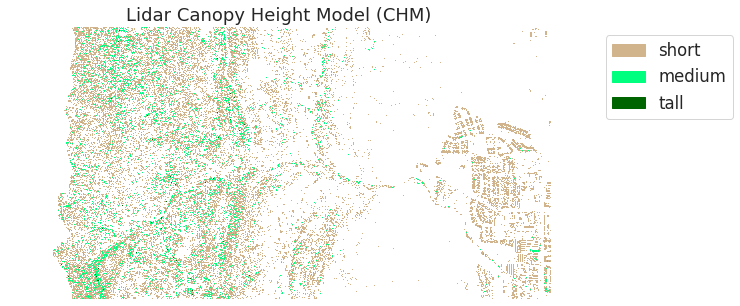

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
chm_plot = ax.imshow(lidar_chm,
                     cmap=cmap,
                     norm=norm)
ax.set_title("Lidar Canopy Height Model (CHM)")

# Add a legend for labels
legend_labels = {"tan": "short", "springgreen": "medium", "darkgreen": "tall"}

patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]
ax.legend(handles=patches,
          bbox_to_anchor=(1.35, 1),
          facecolor="white")
ax.set_axis_off()
plt.show()


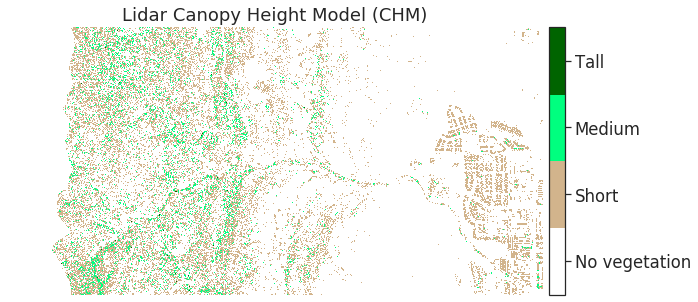

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
chm_plot = ax.imshow(lidar_chm,
                     cmap=cmap,
                     norm=norm)
ax.set_title("Lidar Canopy Height Model (CHM)")
# Scale color bar to the height of the plot
cbar = ep.colorbar(chm_plot)

boundary_means = [np.mean([norm.boundaries[ii], norm.boundaries[ii - 1]])
                  for ii in range(1, len(norm.boundaries))]
category_names = ['No vegetation', 'Short', 'Medium', 'Tall']
cbar.set_ticks(boundary_means)
cbar.set_ticklabels(category_names)
ax.set_axis_off()
plt.show()
